<b> Author: Sami Mwanje, mm223kk@student.lnu.se </b>

In [10]:
import numpy as np
import  pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt
from sklearn import metrics
from numpy.random import default_rng
from matplotlib import pyplot
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

The numpy library is used to handle matrixes.

Pandas used for read the csv file.

Sklearn is used for DecisionTreeClassifier.

Matplotlib is used for the plots.

In [11]:
fasionTrain = np.asarray(pd.read_csv('fashion-mnist_train.csv', delimiter=',')) # Read the bm data file.
fasionTest = np.asarray(pd.read_csv('fashion-mnist_test.csv', delimiter=',')) # Read the bm data file.

#np.random.shuffle(fasionTrain)          # Shuffle the training data.
#np.random.shuffle(fasionTest)           # Shuffle the test data.

# Split dataset into training set and test set
X_train = fasionTrain[:,1:]
y_train = fasionTrain[:,0]

X_test = fasionTest[:,1:]
y_test = fasionTest[:,0]

Read the fashion-mnist_train.csv and fashion-mnist_test.csv.

Add the corresponding data X and Y to np-arrays.

<b> Exercise 5.1: ML in Fashion,

Plot 16 random samples from the training set with the corresponding labels. </b>

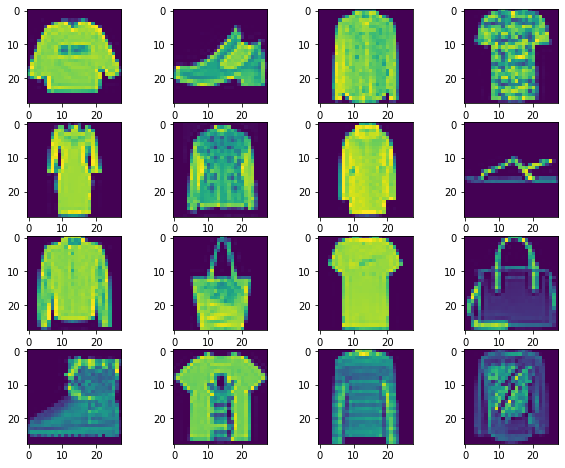

In [12]:
plt.figure(figsize=(10, 8)) #Figure size.
for i in range(16):
	plt.subplot(4, 4, i+1)			# Current row and column
	plt.imshow(X_train[i].reshape(28,28)) # Input to plt image.
plt.show() # Show plot.

Used to print 16 random images, the training data is shuffeled in the begining. So the images will be random for each run.

<b> Exercise 5.2: Train a multilayer perceptron to achieve as good accuracy as you can. </b>

In [13]:
rows = 10000     # Rows that are going to be used from the data set, using this due to time consumption.
iterations = 1000
svcParameters = {
    #'max_iter': [200, 1000, 100000],
    'hidden_layer_sizes': [(10,), (20,15),(100,)],
    'activation': ['logistic','tanh', 'relu'],
    'solver': ['sgd', 'lbfgs','adam'],
    'alpha': [1e-9, 1e-6,1],
    'early_stopping': [True, False],
}
##### Uncomment bellow to use values from grid search. #######
 MPLClass = MLPClassifier(max_iter=iterations)
 gridSearchCV = GridSearchCV(MPLClass, svcParameters, cv = 5,n_jobs=-1)    # Prepare grid search for current SVC parameter.
 gridSearchCV.fit(X_train[:rows,:], y_train[:rows])                        # Deacreased size of training set.
 bestScore = abs(gridSearchCV.best_score_)                                 # Check for best score.
 bestParams = gridSearchCV.best_params_                                    # Check for best params.
 print("Best params: "+str(bestParams)+",\nBest Score: " +str(bestScore)+"\n")

##### Uncomment  bellow to use values from grid search. #######
 MPLClass = MLPClassifier(early_stopping =True, max_iter=iterations, 
 solver=bestParams["solver"], alpha=bestParams["alpha"], 
 activation=bestParams["activation"],  hidden_layer_sizes=bestParams["hidden_layer_sizes"])          # Use values from grid search hypertunning


I used grid search in order to find fiting hyperparameters. Since the grid search was very time consuming, and hade a big load on my CPU, I had to reduce the train set to a smaller amount of data, and change the max_iter=1000 to a lower value.

I also had to reduce the scope of various hyperparameters. I do not think that the results I got from the grid search is the very best if the full sets were being used, but this works in order to complete these particular exercise.

The rows I used for the sets can be increased by changing the "rows" variable, if a more "proper" and time consuming hyperparameter search is desired to be done.

<b> Exercise 5.3: Plot the confusion matrix,

Which are the easy/hard categories to classify? Are there any particular
classes that often gets mixed together?
 </b>

Accuracy test set: 0.8288


c:\Users\Sami\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


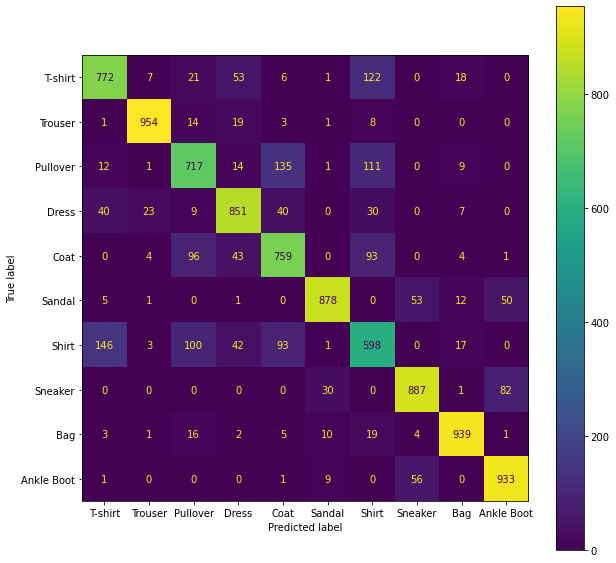

In [14]:
#### Uncomment bellow to manually set values. # Manually set the values. Uncomment above to use above. #####
MPLClass = MLPClassifier(early_stopping =False, max_iter=iterations,activation='logistic', solver='lbfgs', alpha=1e-6, hidden_layer_sizes=(100,)) 
MPLClass.fit(X_train[:rows,:], y_train[:rows]) # Train with train set.
predictions = MPLClass.predict(X_test)     # Get predictions with test set.
print('Accuracy test set:', MPLClass.score(X_test, y_test))
possibilities = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", # Label names.
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]
cm = confusion_matrix(y_test, predictions)                                  # Set the confusion matrix parameters.
cmDisplay = ConfusionMatrixDisplay(cm, display_labels=possibilities)                    # Plot the confusion matrix with cm-parameters.
fig, ax = plt.subplots(figsize=(10,10)) # Figure size.
cmDisplay.plot(ax=ax)

As said above, some hyperparameters had to be reduced due to the time and CPU consumption. I manually set the hyperparameters by using a smaller data set on the grid search and then tuned it a little bit. Max-Iterations and dataset rows were also reduced. These values can be changed manully for a "proper" and more time consuming grid search.

As we can first see the shirt got mixed up with the t-shirt, pullover, and coat up to 100 + times. This is a normal mistake which can occur even us humans. This was the hardest one to predict for the model.

The pullover also got mixed up with the coat, this is probably due to that they look very much a like. Even the coat got mixed up with the pullover, T-shirt and the shirt. Same occured for the corresponding images. ( Coat, pullover, T-shirt and shirt). These seemed harder to predict since they in someway have a common structure.

The easiest to predict was the ankle boot, trouser and the bag. The ankle boot got some times mixed up with the sneaker which is logic, but in summary these three were the easiest one to predict.